<a href="https://colab.research.google.com/github/AnirudhJM24/myML/blob/main/resumenb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
rs = pd.read_csv("resume.csv",encoding= 'unicode_escape')
rs.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [113]:
rs.rename(columns = {'class':'cz'}, inplace = True)

In [114]:
rs.cz = rs.cz.map({'not_flagged':0,'flagged':1})
rs.head()

,resume_id,cz,resume_text
0,resume_1,0,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,0,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,0,\rLTS Software Engineer Computational Lithogra...
3,resume_4,0,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,1,\rIndependent Consultant - Self-employed\rBurl...


In [115]:
rs.drop(['resume_id'],axis='columns',inplace=True)
rs.head()

,cz,resume_text
0,0,\rCustomer Service Supervisor/Tier - Isabella ...
1,0,\rEngineer / Scientist - IBM Microelectronics ...
2,0,\rLTS Software Engineer Computational Lithogra...
3,0,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,1,\rIndependent Consultant - Self-employed\rBurl...


In [116]:
rs['resume_text'] = rs['resume_text'].apply(lambda x: x.replace('\r',''))

In [117]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [119]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [120]:
rs['resume_text'] = rs['resume_text'].apply(preprocess)

In [121]:
rs['resume_text'].head()

0    customer service supervisor tier isabella cata...
1    engineer scientist ibm email com albert gregor...
2    lts software engineer computational lithograph...
3    tutorwilliston email com alec schwartz awork c...
4    independent consultant self email com alex reu...
Name: resume_text, dtype: object

In [144]:
rs.head()

,cz,resume_text
0,0,customer service supervisor tier isabella cata...
1,0,engineer scientist ibm email com albert gregor...
2,0,lts software engineer computational lithograph...
3,0,tutorwilliston email com alec schwartz awork c...
4,1,independent consultant self email com alex reu...


In [147]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cz           125 non-null    int64 
 1   resume_text  125 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [122]:
from sklearn.model_selection import train_test_split

In [137]:
atrain,atest,btrain,btest = train_test_split(rs.resume_text,rs.cz,test_size=0.15)

In [138]:
len(atrain)

106

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [126]:
from sklearn.pipeline import Pipeline
gb = Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [139]:
atrain = [str (item) for item in atrain]
atest = [str (item) for item in atest]

In [140]:
gb.fit(atrain,btrain)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [141]:
z=gb.predict(atest)

In [142]:
cm = confusion_matrix(z,btest)


Text(114.0, 0.5, 'Truth')

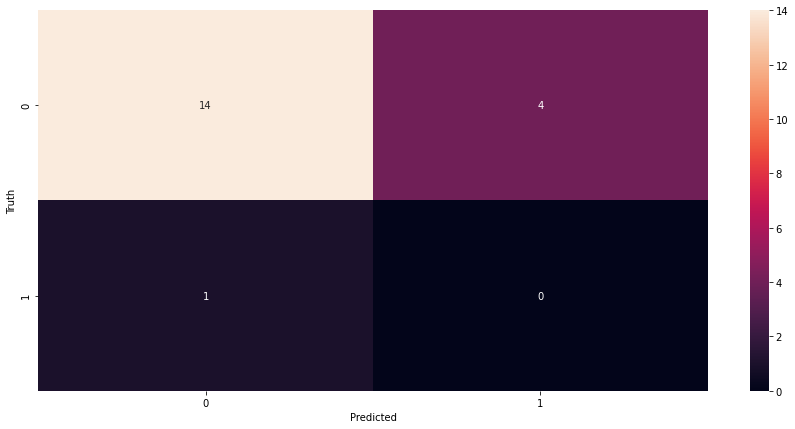

In [143]:


plt.figure(figsize = (15,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')